In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
K = len(np.unique(y_train)) # Return the unique elements of a tratining output set and take it length as Classes
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean_image = np.mean(x_train, axis=(0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))
x_train = (x_train - mean_image)/(std+1e-7)
x_test = (x_test - mean_image)/(std+1e-7)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
#This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of
#the input vector and number of columns equal to the number of classes.
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)
y_train: (50000, 10)
y_test: (10000, 10)


In [17]:
model = Sequential()
# convolution layer & maxpooling layer with 32 nodes
model.add(Conv2D(32, (3, 3), activation = "relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# convolution layer & maxpooling layer with 64 nodes
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten serves as a connection between the convolution and dense layers. 
model.add(Flatten()) 
# output layer
model.add(Dense(64, activation = "relu"))
model.add(Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [18]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_test,y_test),)

Epoch 1/50
1000/1000 [==============================] - 52s 51ms/step - loss: 1.6731 - accuracy: 0.3863 - val_loss: 1.2266 - val_accuracy: 0.5589
Epoch 2/50
1000/1000 [==============================] - 60s 60ms/step - loss: 1.1190 - accuracy: 0.6030 - val_loss: 0.9886 - val_accuracy: 0.6577
Epoch 3/50
1000/1000 [==============================] - 61s 61ms/step - loss: 0.9320 - accuracy: 0.6752 - val_loss: 0.9083 - val_accuracy: 0.6890
Epoch 4/50
1000/1000 [==============================] - 46s 46ms/step - loss: 0.8158 - accuracy: 0.7144 - val_loss: 0.8581 - val_accuracy: 0.7048
Epoch 5/50
1000/1000 [==============================] - 47s 47ms/step - loss: 0.7380 - accuracy: 0.7436 - val_loss: 0.8598 - val_accuracy: 0.7067
Epoch 6/50
1000/1000 [==============================] - 46s 46ms/step - loss: 0.6811 - accuracy: 0.7616 - val_loss: 0.8284 - val_accuracy: 0.7173
Epoch 7/50
1000/1000 [==============================] - 44s 44ms/step - loss: 0.6141 - accuracy: 0.7835 - val_loss: 0.8292 -

In [19]:
loss_history, test_loss_history, train_acc_history,val_acc_history = (history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])

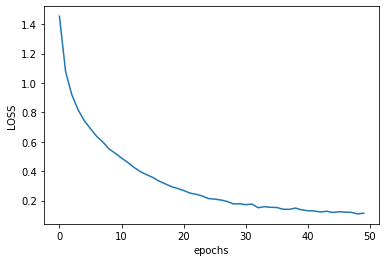

In [20]:
fig, axes = plt.subplots()
axes.plot(loss_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("LOSS")
plt.show()
fig.savefig('LOSS.png',transparent=True)

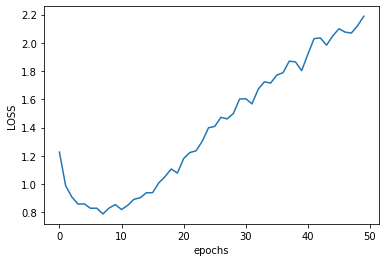

In [21]:
fig, axes = plt.subplots()
axes.plot(test_loss_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("LOSS")
plt.show()
fig.savefig('testing_loss.png',transparent=True)

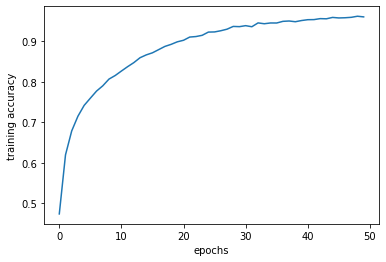

In [22]:
fig, axes = plt.subplots() 
axes.plot(train_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("training accuracy")
plt.show()
fig.savefig('training accuracy.png',transparent=True)

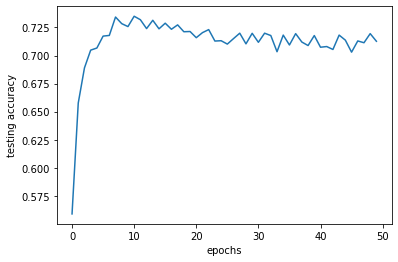

In [23]:
fig, axes = plt.subplots() 
axes.plot(val_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("testing accuracy")
plt.show()
fig.savefig('testing accuracy.png',transparent=True)